**QUESTION 1**

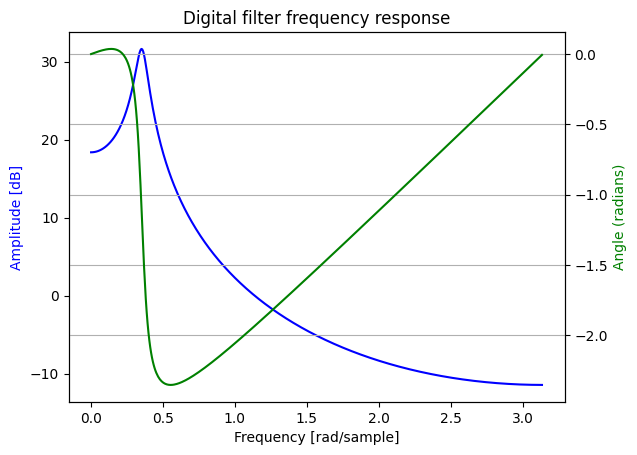

In [30]:
# Import the required packages
import numpy as np
from scipy.signal import zpk2tf,freqz,sawtooth,square,impulse
from math import pi
from numpy import exp,zeros_like,cos,sin,log10,angle
from numpy import convolve as conv
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

# Given Data in Question 1 as
f1 = 900    # formant frequency
b1 = 200    # bandwidth
fs = 16000  # sampling frequency
ts = 1.0/fs # sampling time

# We know the transfer function H(z), along with the equations of r and theta
# Transforming to s plane
r = np.exp(-pi*b1*ts)
theta = 2*pi*f1*ts
poles = [r*exp(1j*theta) , r*exp(-1j*theta)]
zeros = zeros_like(poles)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.zpk2tf.html
b,a = zpk2tf(zeros,poles,k=1)

# Frequency Response Calculation
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
w,h = freqz(b, a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()


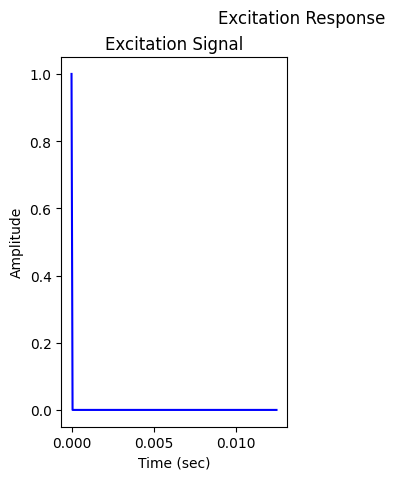

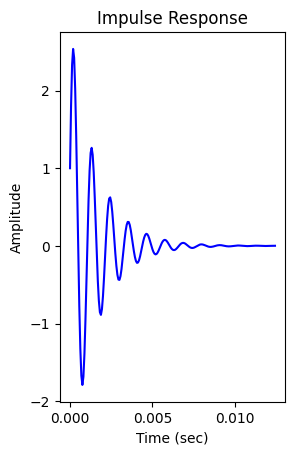

In [31]:
# Impulse Response Calculation
# Pulse Input as
pulse = np.zeros((200,1))
pulse[0] = 1

# Initializing the impulse response
# https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html
y = zeros_like(pulse)
time = np.linspace(0,len(pulse)*1.0/fs , 200, endpoint=False)

for n in range(len(pulse)):
    y[n] += b[0] * pulse[n]
    for k in range(1,len(b)):
        if (n-k)>=0:
            y[n] -= a[k] * y[n-k]

plt.figure()
plt.suptitle(r"Excitation Response",fontsize=12)
plt.subplot(1,2,1)
plt.plot(time,pulse,'b')
plt.title("Excitation Signal")
plt.ylabel(r"Amplitude",fontsize=10)
plt.xlabel(r"Time (sec)",fontsize=10)
plt.show()
plt.subplot(1,2,2)
plt.plot(time,y,'b')
plt.title("Impulse Response")
plt.ylabel(r"Amplitude",fontsize=10)
plt.xlabel(r"Time (sec)",fontsize=10)
plt.show()

**QUESTION 2**

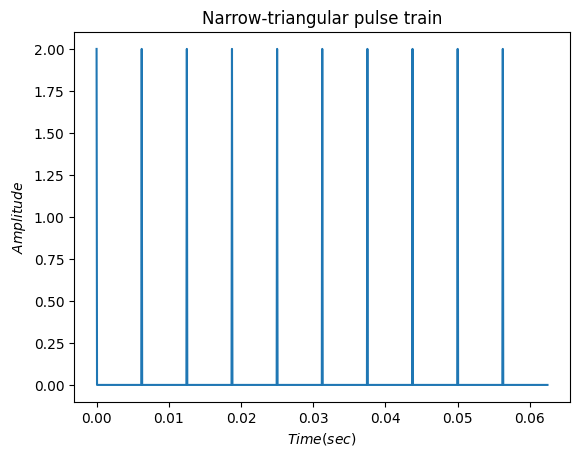

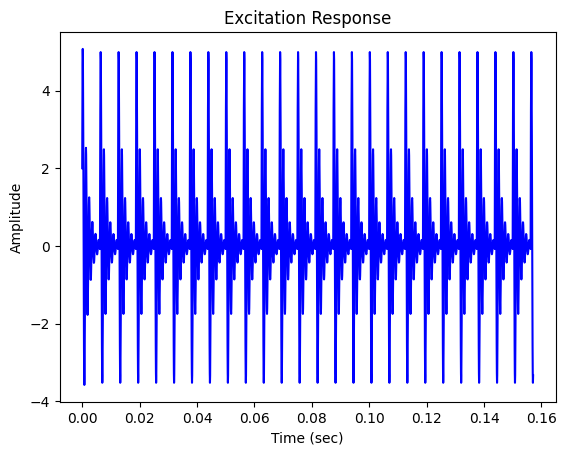

In [32]:
f0 = 160
time = 0.5
num_samples = int(fs*time)
poles = [r*exp(1j*theta) , r*exp(-1j*theta)]
zeros = 0
b,a = zpk2tf(zeros,poles,k=1)

# Excitation signal formation
t = np.linspace(0,time,num_samples)
# Sawtooth approximation using square
sig = square(2 * pi * f0* t, duty=0.01)+1

plt.figure()
plt.plot(t[:1000],sig[:1000])
plt.xlabel("$Time (sec)$",fontsize=10)
plt.ylabel("$Amplitude$",fontsize=10)
plt.title("Narrow-triangular pulse train")
plt.show()

#Calculation Excitation response
y = zeros_like(sig)
# difference equation
for n in range(len(sig)):
    for k in range(len(b)):
            if (n-k)>=0:
                y[n] += b[k] * sig[n-k]
    for k in range(1,len(b)):
        if (n-k)>=0:
            y[n] += b[k] * sig[n-k]
    for k in range(1,len(a)):
        if (n-k)>=0:
            y[n] -= a[k] * y[n-k]

#plotting the excitation response
plt.figure()
plt.title("Excitation Response",fontsize=12)
plt.plot(t[:2514],y[:2514],'b')
plt.ylabel("Amplitude",fontsize=10)
plt.xlabel("Time (sec)",fontsize=10)
plt.show()

# saving the wav file
write("E:\Courses\EE679_Speech\Assignment1"+"_".join([str(f0),str(f1),str(b1)])+".wav",fs,y)



**QUESTION 3**

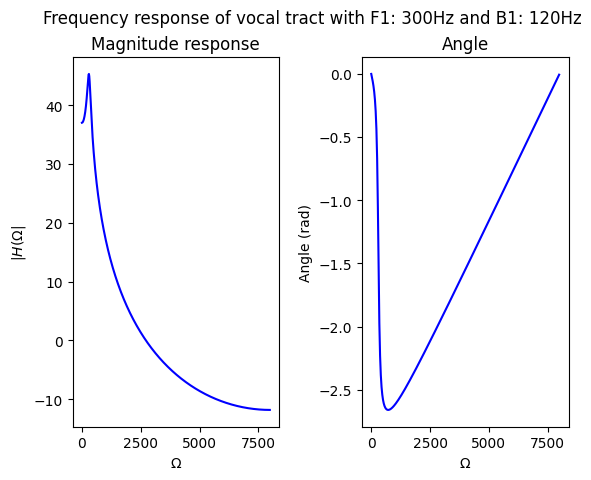

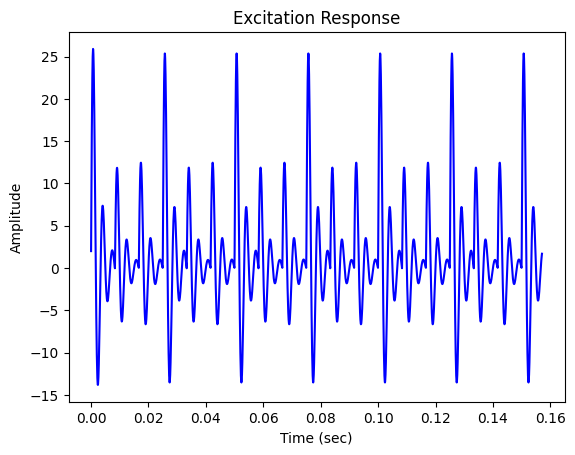

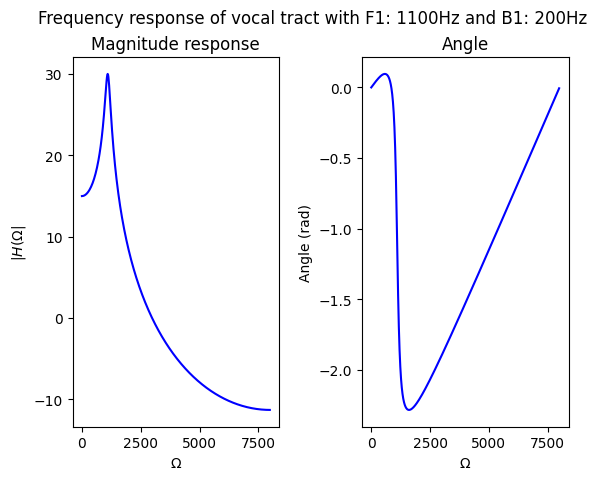

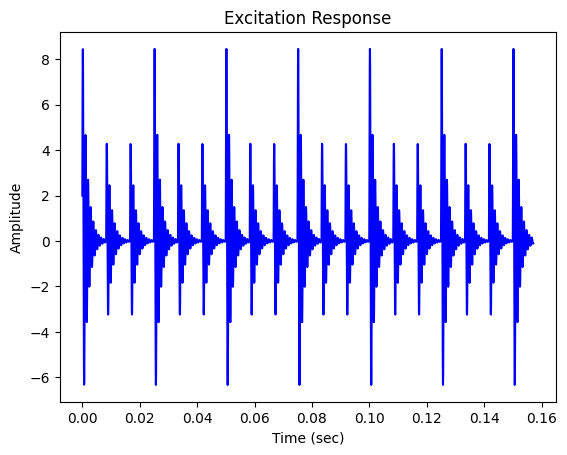

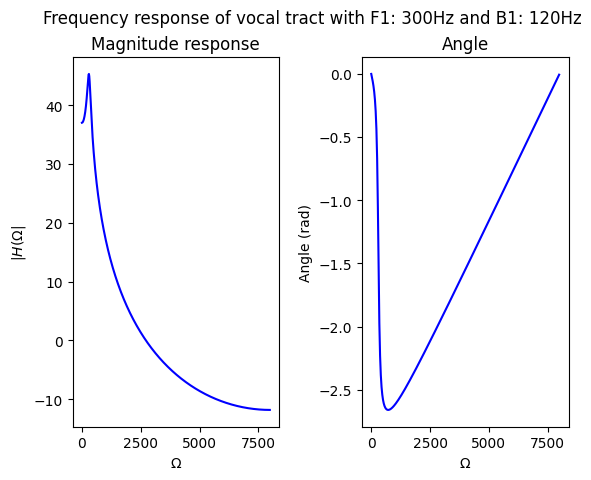

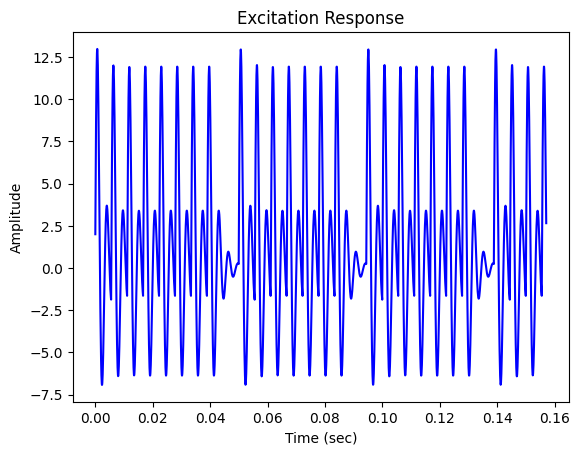

In [33]:
def generate_signal_response(time,sig,b,a):
    """
    Given the signal, its duration, the filter numerator and denominator
    coefficients, this function calculates the excitation signal response
    of the filter, saves the plots in the plots directory and returns the
    response.
    inputs: time (time duration of the signal)
            sig (the excitation signal to the filter)
            b,a : filter numerator and denominator coefficients
    outputs: filter response y
    """
    y = zeros_like(sig)
    # difference equation
    for n in range(len(sig)):
        for k in range(len(b)):
            if (n-k)>=0:
                y[n] += b[k] * sig[n-k]
        for k in range(1,len(a)):
            if (n-k)>=0:
                y[n] -= a[k] * y[n-k]
    return y

def plot_and_save_waveform(t,y,f_signal,f1,b1,f_sampling):
    """
    Plots and saves the output of the filter excited with the signal upto a few pitch periods.
    inputs: t(time-vector of the excitation signal)
            y( output response of the filter)
            f_signal ( excitation signal frequency )
            f1 (formant frequency of the filter)
            b1 (bandwidth of the filter)
            f_sampling (sampling frequency)
    outputs: None
    """
    plt.figure()
    plt.title(r"Excitation Response",fontsize=12)
    plt.plot(t[:2514],y[:2514],'b')
    plt.ylabel(r"Amplitude",fontsize=10)
    plt.xlabel(r"Time (sec)",fontsize=10)
    plt.show()
    write("E:\Courses\EE679_Speech\Assignment1"+"_".join([str(f_signal),str(f1),str(b1)])+".wav",f_sampling,y)

def plot_magnitude_response(b,a,f1,b1):
    """
    Plots the magnitude and phase response of the filter using the numerator and denominator
    coefficients of the filter.
    inputs: b,a (filter numerator and denominator coefficients)
            f1,b1 (formant frequency and bandwidth, used to save the figure only)
    outputs: None (saves the magnitude and frequency response)
    """
    # frequency response calculation
    w,h = freqz(b,a)
    plt.figure()
    s = "Frequency response of vocal tract with F1: {}Hz and B1: {}Hz"
    plt.suptitle(s.format(f1,b1),fontsize=12)
    plt.subplot(1,2,1)
    plt.plot(fs * w/(2*pi),20*log10(abs(h)),'b')
    plt.title(r"Magnitude response",fontsize=12)
    plt.ylabel(r"$|H(\Omega|$",fontsize=10)
    plt.xlabel(r"$\Omega$")
    plt.subplot(1,2,2)
    angles = np.angle(h)
    plt.plot(fs * w/(2*pi),angles,'b')
    plt.title(r"Angle",fontsize=12)
    plt.ylabel(r"Angle (rad)",fontsize=10)
    plt.xlabel(r"$\Omega$",fontsize=10)
    plt.subplots_adjust(left=0.125,
                    wspace=0.4, )
    plt.show()

def generate_waveform(f1,b1,f_signal,fs=16000):
    """
    Compiles all the support functions to produce the output
    inputs: f1 (first formant frequency of the filter)
            b1 (bandwidth around the first formant frequency)
            f_signal (excitation signal frequency)
            fs (sampling frequency)
    output: None
    """
    time = 0.5 # total time duration
    ts = 1/fs # sampling time
    num_samples = int(fs*time) # total number of signal samples
    r = np.exp(-pi*b1*ts) #radius in z-plane
    theta = 2*pi*f1*ts #angle in z-plane

    poles = [r*exp(1j*theta) , r*exp(-1j*theta)] #poles : 2 for every formant
    zeros = zeros_like(poles) # zeros

    b,a = zpk2tf(zeros,poles,k=1)
    plot_magnitude_response(b,a,f1,b1)
    t = np.linspace(0,time,num_samples)

    # sawtooth approximation using square
    sig = square(2 * pi * f_signal* t, duty=0.01)+1

    #
    response = generate_signal_response(t,sig,b,a)
    plot_and_save_waveform(t,response,f_signal,f1,b1,fs)

formant_frequencies = [300, 1100, 300]
bandwidths= [120, 200, 120]
signal_frequencies = [120,120,180]

for i,j,k in list(zip(formant_frequencies,bandwidths,signal_frequencies)):
    generate_waveform(i,j,k)

**QUESTION 4**

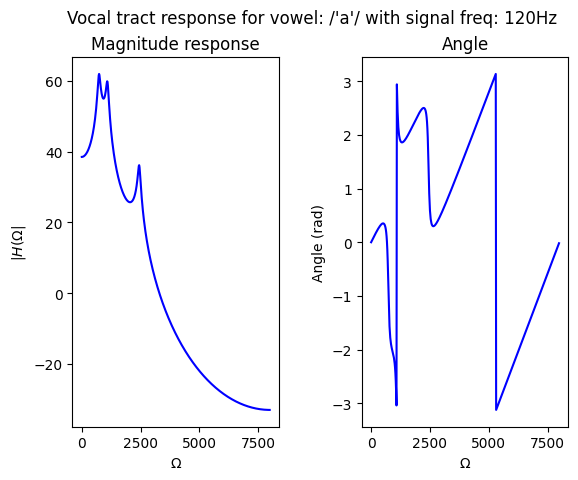

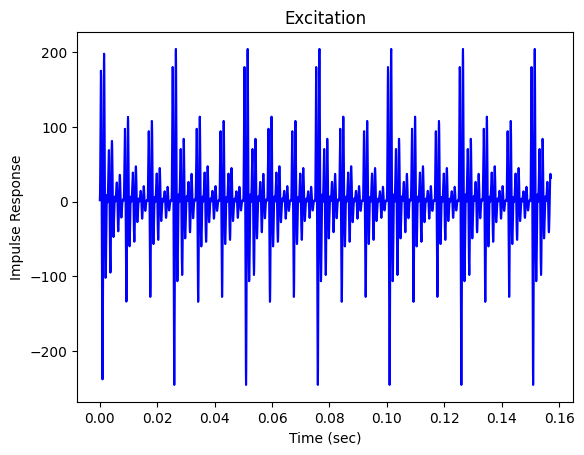

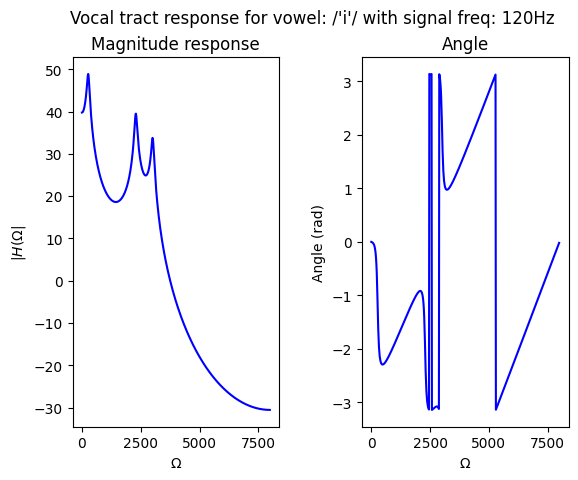

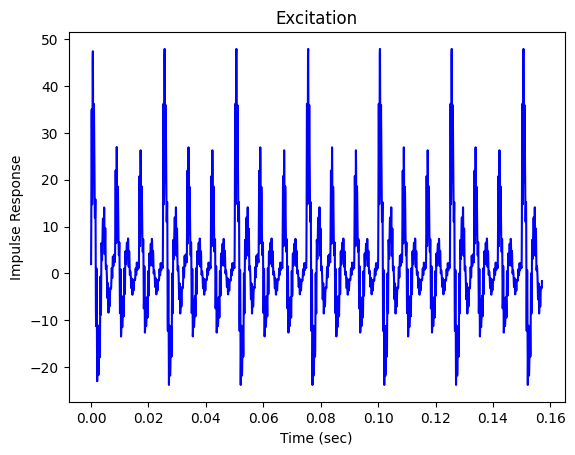

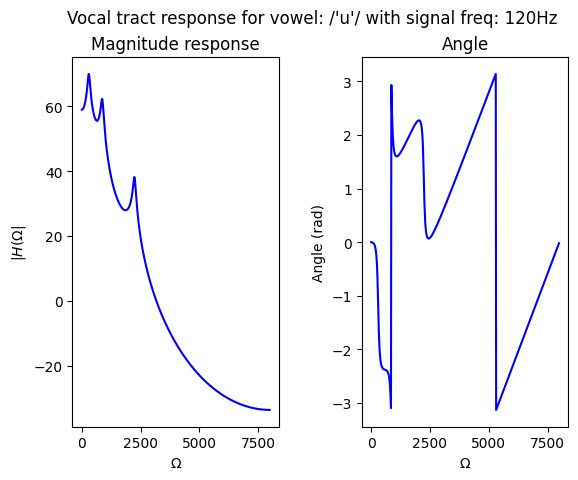

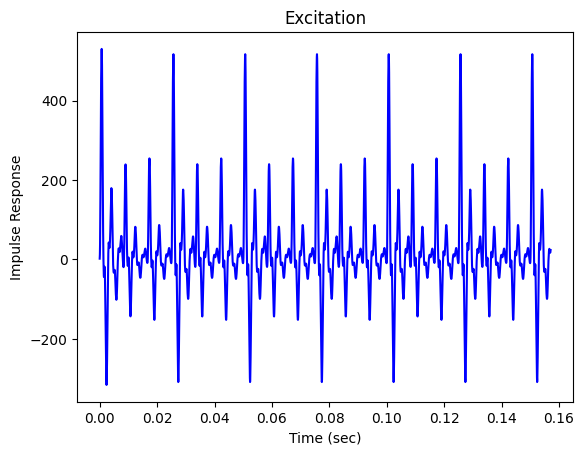

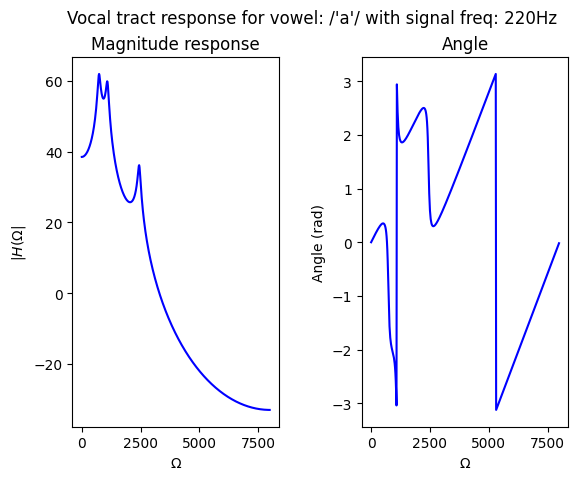

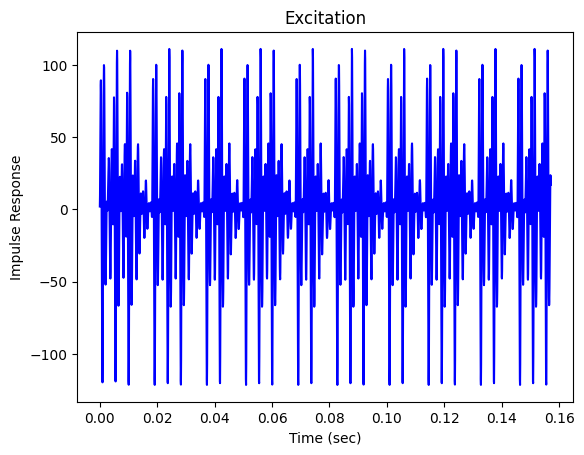

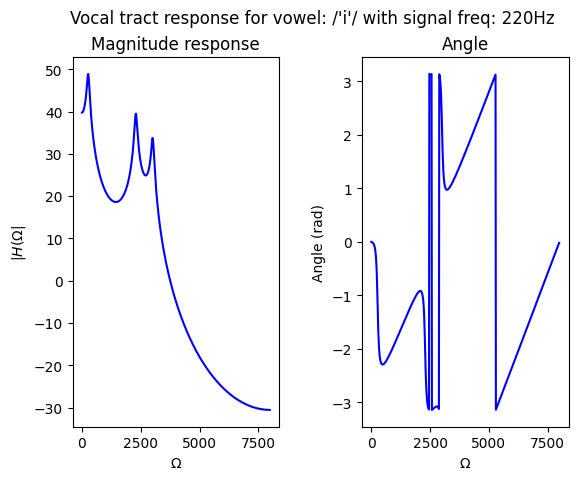

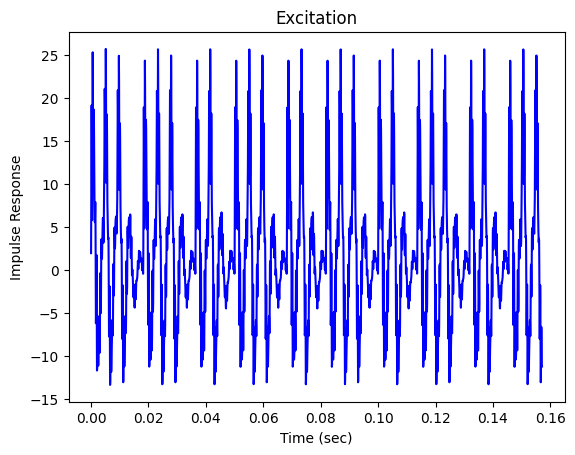

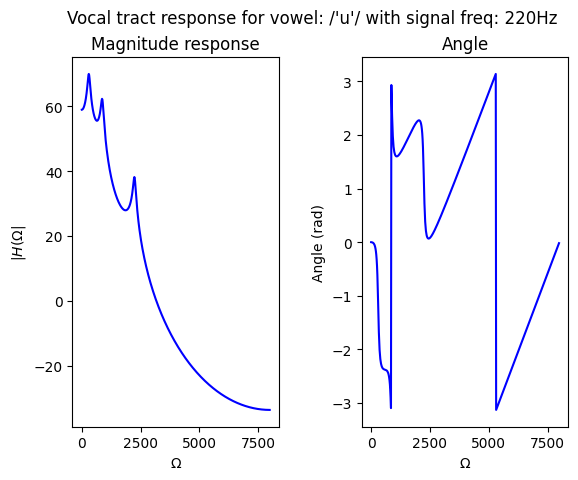

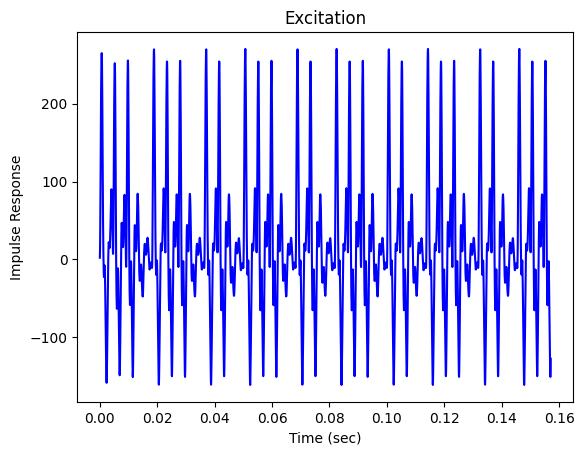

In [35]:
def generate_signal_response(t,sig,b,a):
    """
    Generates the excitation signal response from the signal and filter coefficients using the difference equation
    inputs: t (time-vector of the excitation signal)
            sig (excitation signal)
            b,a (filter numerator and denominator coefficients)
    output: returns the filter excitation response
    """
    y = zeros_like(sig)
    # difference equation
    for n in range(len(sig)):
        for k in range(len(b)):
            if (n-k)>=0:
                y[n] += b[k] * sig[n-k]
        for k in range(1,len(a)):
            if (n-k)>=0:
                y[n] -= a[k] * y[n-k]
    return y

def plot_magnitude_response(b,a,vowel,f0):
    """
    Plots the magnitude and phase response of the filter using the numerator and denominator
    coefficients of the filter.
    inputs: b,a (filter numerator and denominator coefficients)
            vowel (the vowel parameters being used)
            f0 (excitation signal frequency)
    outputs: None (saves the magnitude and frequency response)
    """
    w,h = freqz(b,a)
    plt.figure()
    s = "Vocal tract response for vowel: /'{}'/ with signal freq: {}Hz"
    plt.suptitle(s.format(vowel,f0) ,fontsize=12,weight=2)
    plt.subplot(1,2,1)
    plt.plot(fs * w/(2*pi),20*log10(abs(h)),'b')
    plt.title("Magnitude response",fontsize=12)
    plt.ylabel(r"$|H(\Omega|$",fontsize=10)
    plt.xlabel(r"$\Omega$")
    plt.subplot(1,2,2)
    angles = np.angle(h)
    plt.plot(fs * w/(2*pi),angles,'b')
    plt.title(r"Angle",fontsize=12)
    plt.ylabel(r"Angle (rad)",fontsize=10)
    plt.xlabel(r"$\Omega$",fontsize=10)
    plt.subplots_adjust(left=0.125,
                    wspace=0.4)
    plt.show()

def plot_and_save_waveform(t,y,f_signal,f_sampling,vowel):
    """
    Plots and saves the output of the filter excited with the signal upto a few pitch periods.
    inputs: t(time-vector of the excitation signal)
            y( output response of the filter)
            f_signal ( excitation signal frequency )
            f_sampling (sampling frequency)
            vowel (the vowel being coded)
    outputs: None
    """
    plt.figure()
    plt.title("Excitation",fontsize=12)
    plt.plot(t[:2514],y[:2514],'b')
    plt.ylabel("Impulse Response",fontsize=10)
    plt.xlabel("Time (sec)",fontsize=10)
    plt.show()
    write("E:\Courses\EE679_Speech\Assignment1"+"_"+str(f_signal)+"_"+vowel+".wav",f_sampling,y)

def vocal_tract(formant_frequencies):
    """
    Given the formant frequencies calculates the numerator and denominator coefficients
    by convolving between the different formant frequencies
    inputs: formant_frequencies (list of the formant frequencies)
    outputs: numerator and denominator coefficients
    """
    global bw
    r = []
    theta = []
    for i in formant_frequencies:
        r.append(np.exp(-pi*bw*ts)) #radius in z-plane
        theta.append(2*pi*i*ts) #angle in z-plane

    denom_coeffs = []
    num_coeffs = []
    convolved_a = 1
    for radius,angle in zip(r,theta):
        poles = [radius*exp(1j*angle),radius*exp(-1j*angle)]
        zeros = zeros_like(poles)
        b,a = zpk2tf(zeros,poles,k=1)
        num_coeffs.append(b)
        denom_coeffs.append(a)
        convolved_a = conv(convolved_a,a)

    denom_coeffs = zeros_like(convolved_a)
    denom_coeffs[0] = 1

    return denom_coeffs,convolved_a

def generate_vowels(formant_frequencies,bandwidth,signal_frequency,vowel,time,f_sampling):
    ts = 1/f_sampling # sampling time
    num_samples = int(f_sampling*time) # total number of signal samples

    b,a = vocal_tract(formant_frequencies)
    plot_magnitude_response(b,a,vowel,signal_frequency)

    t = np.linspace(0,time,num_samples)

    # sawtooth approximation using square
    sig = square(2 * pi * signal_frequency* t, duty=0.01)+1

    response = generate_signal_response(t,sig,b,a)
    plot_and_save_waveform(t,response,signal_frequency,f_sampling,vowel)

f0 = [120,220]
f1 = [730,270,300]
f2 = [1090,2290,870]
f3 = [2440,3010,2240]
bw = 100
vow = ["a","i","u"]
duration = 0.5
fs = 16000 #sampling frequency
vowels = {}
for i in range(len(vow)):
    vowels[vow[i]] = {"formants":[f1[i],f2[i],f3[i]]}

for sig_freq in f0:
    for vowel in vowels:
        generate_vowels(vowels[vowel]["formants"],bw,sig_freq,vowel,duration,fs)